## Simon's Algorithm

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2
from qiskit.visualization import plot_histogram

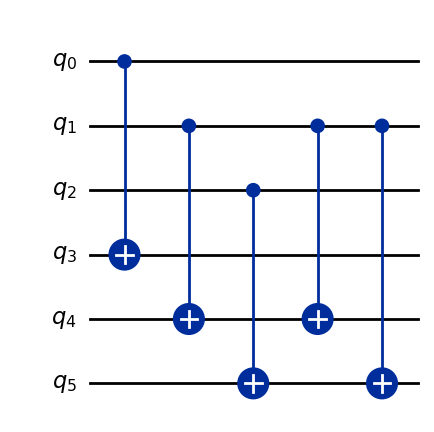

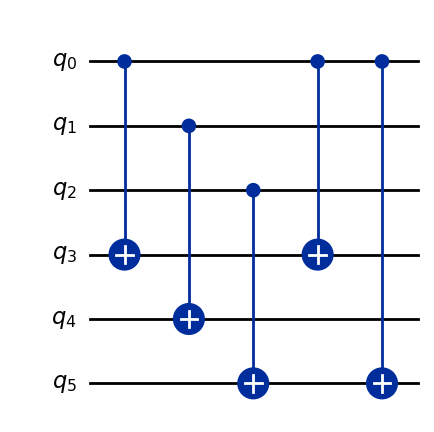

In [27]:
def simon_oracle(b):
    b=b[::-1]  # reverse b for easy iteration
    n=len(b)
    qc = QuantumCircuit(n*2)

    # Do copy; |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q,q+n) # 1-to-1 function promise
    
    if '1' not in b:
        return qc     # 1:1 mapping, so just exit
    
    i = b.find('1')# index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q]=='1':
            qc.cx(i,(q)+n)   # 2-to-1 function promise
    return qc

display(simon_oracle("110").draw("mpl"))
simon_oracle("101").draw("mpl")



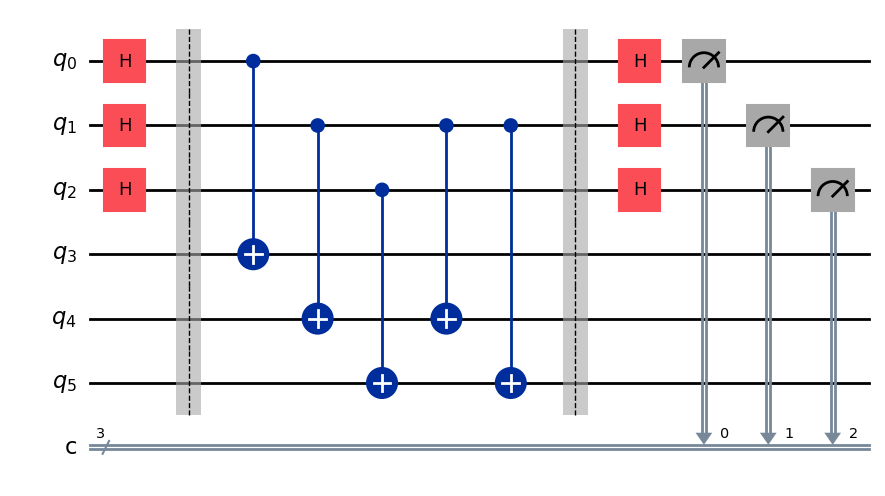

In [28]:
b = "110"
n = len(b)
simon_circuit = QuantumCircuit(n*2,n)
simon_circuit.h(range(n))
simon_circuit.barrier()
simon_circuit.compose(simon_oracle(b),inplace=True)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n),range(n))
simon_circuit.draw("mpl")

{'000': 267, '110': 259, '001': 254, '111': 244}


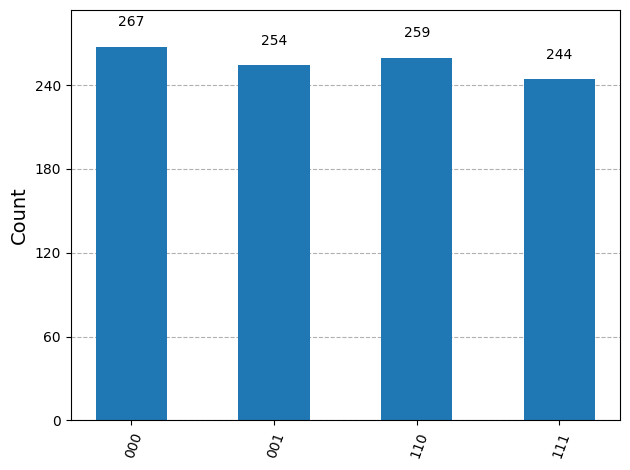

In [30]:
backend = AerSimulator()
sampler_sim = BackendSamplerV2(backend=backend)
job = sampler_sim.run([simon_circuit],shots=1024)
res = job.result()
counts = res[0].data.c.get_counts()
print(counts)
plot_histogram(counts)